# Линейная регрессия в Scikit-Lean

## Часть 1: Настройка данных и обучение модели

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/sanakulov/Personal/ml2/08-Linear-Regression-Models/Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


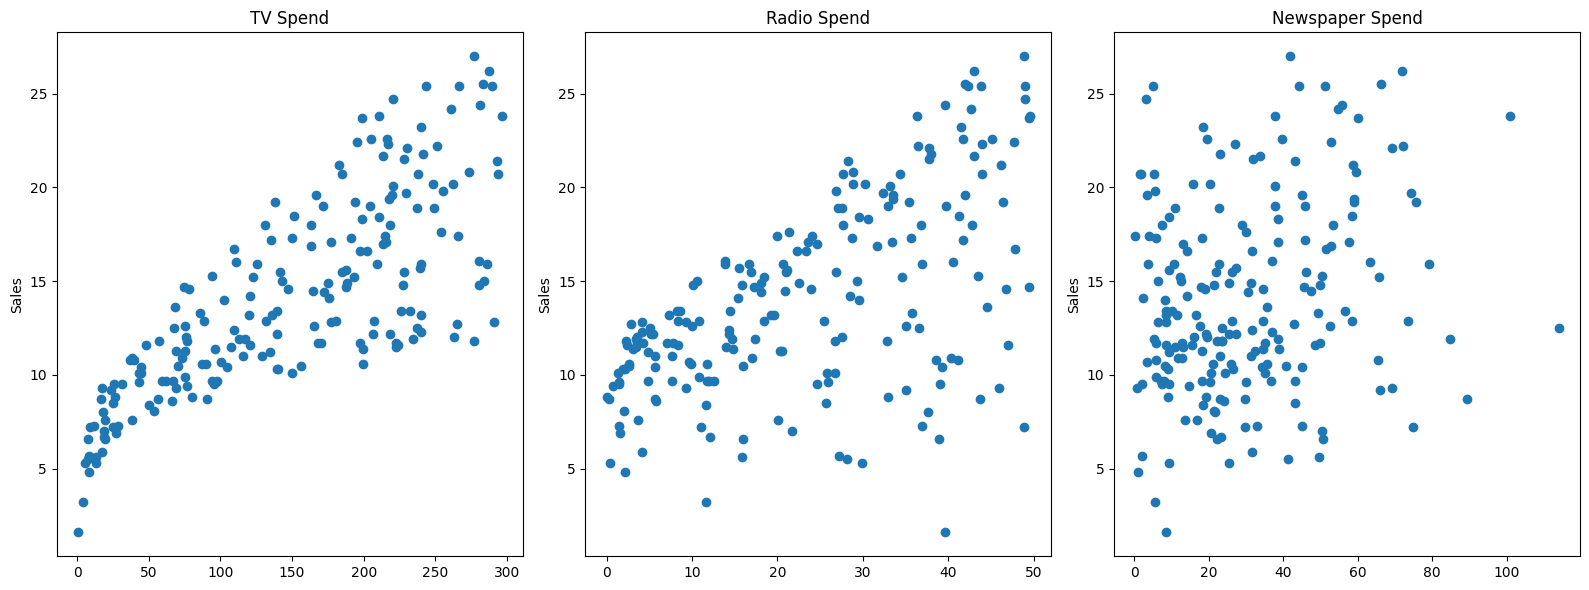

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

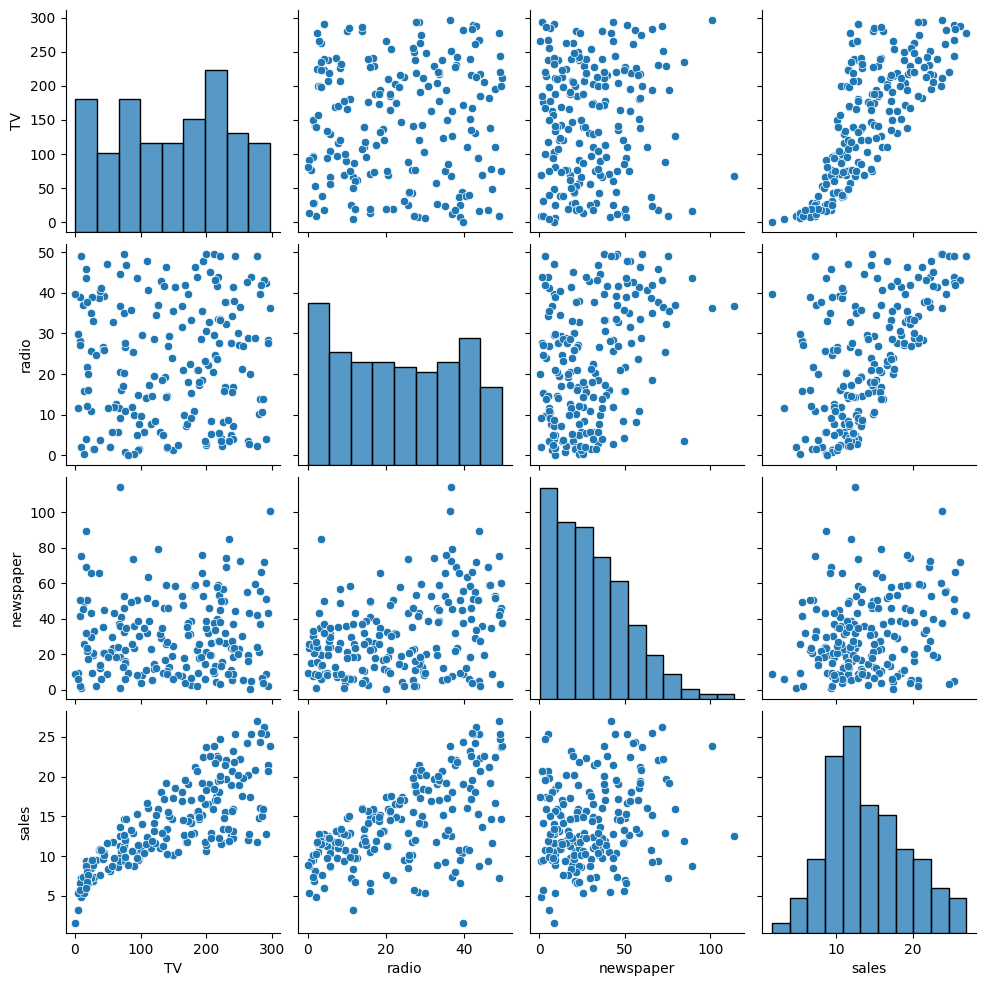

In [6]:
sns.pairplot(df)

In [7]:
X = df.drop("sales", axis=1) # По сути выкидываем только целевую переменную, все остальное признаки

In [8]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y = df["sales"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # random_state по смыслу это random seed

In [13]:
print(f'df: {len(df)}\nX_train: {len(X_train)}\nprc: {len(X_train)/len(df)*100}')

df: 200
X_train: 140
prc: 70.0


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression() # Здесь получаем экземпляр модели линейной регрессии

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
test_predictions = model.predict(X_test) # Получаем предсказание для указанных признаков

Оценка

In [18]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### MAE - средняя абсолютная ошибка

In [20]:
df["sales"].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

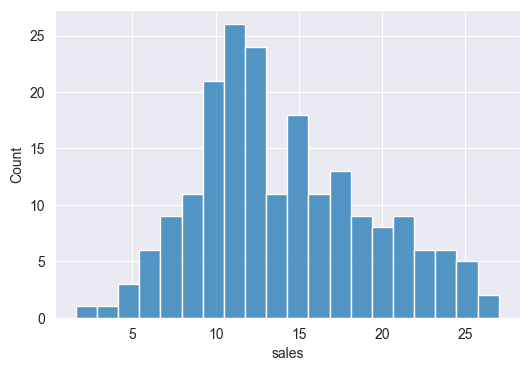

In [21]:
plt.figure(figsize=(6,4), dpi=100)
sns.set_style('darkgrid')
sns.histplot(data=df, x="sales", bins=20)

In [22]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

In [23]:
error = mean_absolute_error(y_test, test_predictions) / df["sales"].mean()
print(f"MAE: {error*100}")

MAE: 8.655701719482837


#### MSE Mean Squarred Error - Среднеквадратическая ошибка

In [24]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993877

In [25]:
error = np.sqrt(mean_squared_error(y_test, test_predictions)) / df["sales"].mean()
print(f"MSE: {error*100}")

MSE: 10.812279818858176


#### Остатки

In [26]:
test_residuals = y_test - test_predictions

In [27]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

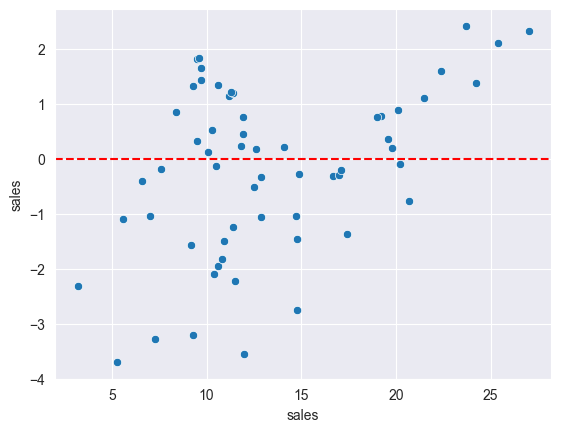

In [28]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0,color="red", ls="--") # добавляем красную линию

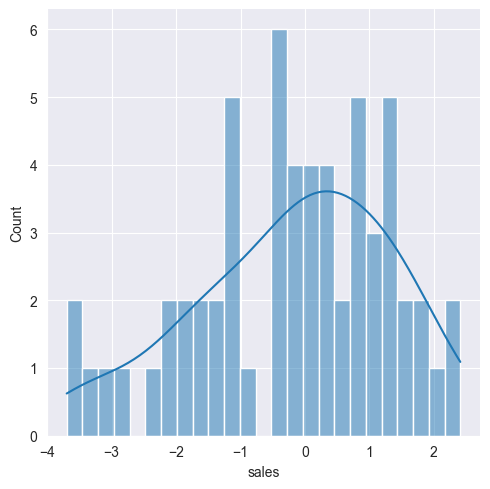

In [29]:
sns.displot(test_residuals,bins=25,kde=True)

In [30]:
import scipy as sp

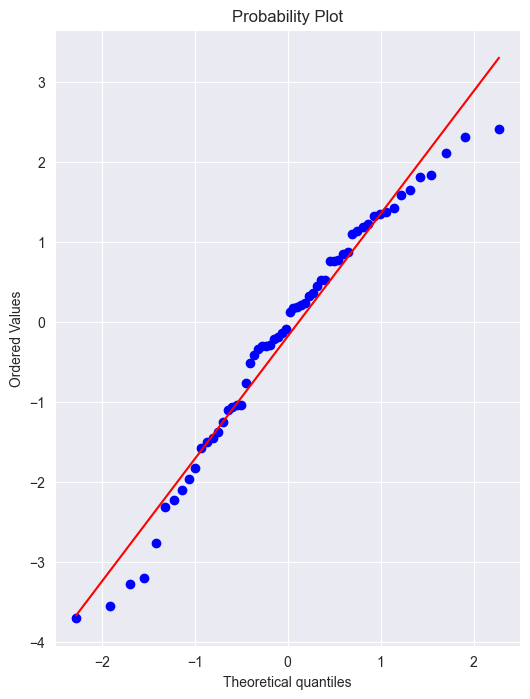

In [31]:
# Создаём объект figure и оси для рисования графика
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot возвращает значения, которые можно использовать при необходимости
# мы хотим просто нарисовать график, поэтому присваиваем эти значения переменной _
_ = sp.stats.probplot(test_residuals,plot=ax)



In [32]:
final_model = LinearRegression()

In [33]:
final_model.fit(X,y)

LinearRegression()

In [34]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [35]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [37]:
y_hat = final_model.predict(X)

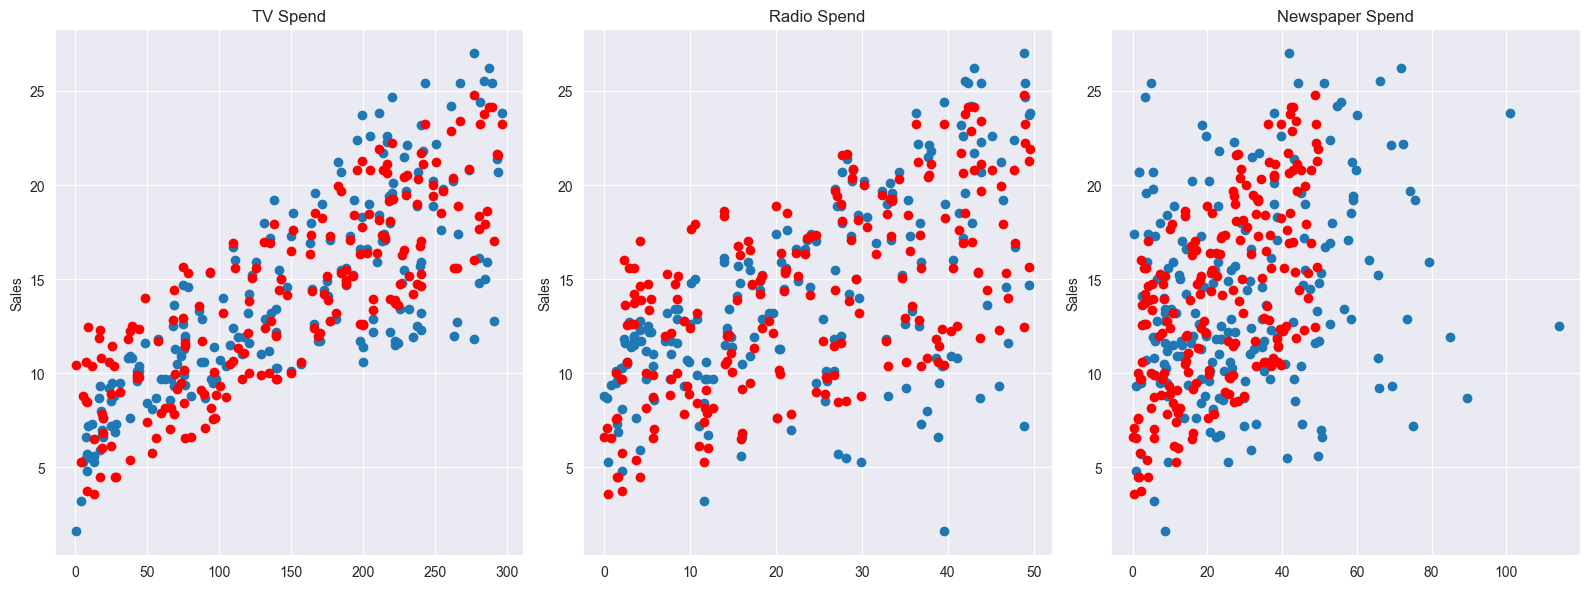

In [38]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [39]:
from joblib import dump, load

In [40]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [41]:
loaded_model = load("final_sales_model.joblib")

In [42]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [44]:
X.shape

(200, 3)

In [45]:
# Потратим 149 на TV, 22 radio, 12 newspaper
# Сколько будет sales?
campaign = [[149,22,12]]

In [46]:
loaded_model.predict(campaign)

/Users/sanakulov/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])